## Assignment 2 (Part b):  Polynomial Regression

The univariate (one dependent variable) and multivariate (more than one dependent variable) linear regression we have discussed so far always assumes a linear relationship between the independent and dependent variables.  In the real world, it is very common to have data where there is a non-linear relationship between the independent and dependent variables.  In these cases, we can use polynomial regression where we assume the relationship between the independent variable x and the dependent variable(s) y is modelled as an nth degree polynomial in x.

For example, we discussed briefly in lecture that the relationship between number of miles walked per day and age can be modeled by a quadratic equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [2]:
kms = np.random.normal(5, 2, 50)
ages = np.random.normal(40,13,50)
ages = [a if a > 0 else -a for a in ages]

In [3]:
first_kms = sorted(kms[0:int(round(len(kms)/2,0))])
second_kms = sorted(kms[int(round(len(kms)/2,0)):len(kms)], reverse=True)

ages = sorted(ages)
kms = first_kms + second_kms
print(len(kms))
print(len(ages))

50
50


In [4]:
df = pd.DataFrame({"age": ages, "kilometers": kms})

In [5]:
df
#below is a dataframe I made to experiment with polynomial regression

,age,kilometers
0,6.325717,0.514630
1,8.794103,0.957490
2,21.204469,1.906189
3,21.774347,2.618049
4,25.015432,3.558823
5,25.145793,3.688061
6,26.103146,3.726953
7,26.637943,4.331845
8,27.334928,4.374696
9,27.958694,4.594707


## Question 1. Plot histogram of age and kilometers and age vs. kilometers (sample output shown in the graphs below) (2 points)


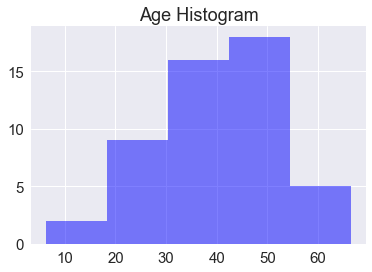

In [6]:
#your code here
#sample output shown below
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
num_bins = 5
plt.hist(df['age'], num_bins, facecolor='blue', alpha=0.5)
plt.title('Age Histogram')
plt.show()

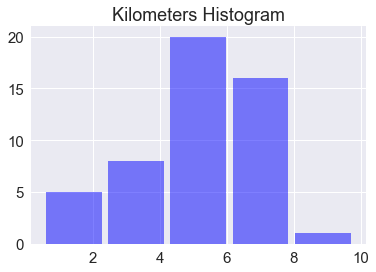

In [7]:
#your code here
#sample output shown here
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
num_bins = 5
plt.hist(df['kilometers'], num_bins, facecolor='blue', alpha=0.5, rwidth = 0.9)
plt.title('Kilometers Histogram')
plt.show()

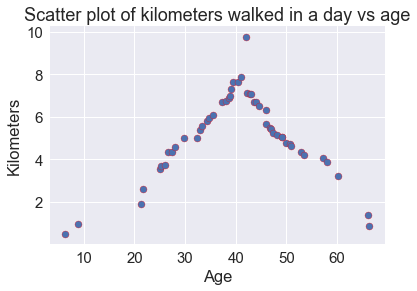

In [8]:
# plot kilometers vs. age
#your code goes here
#sample output shown below
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
#plt.hist(df['age'], num_bins, facecolor='blue', alpha=0.5)
Age = df['age']
Kms = df['kilometers']
plt.scatter(Age, Kms, edgecolors='r')
plt.xlabel('Age')
plt.ylabel('Kilometers')
plt.title('Scatter plot of kilometers walked in a day vs age')
plt.show()

## Question 2. Does the above relationship look linear to you?  If no, what kind of relationship do you think it is? (1 point)


Does the above relationship look linear to you?  If no, what kind of relationship do you think it is?
The relationship betweenage and kilomerters walked is positive initially because as the age increases, kilometers walked also increases but after 40 years of age, we see negative correlation between the 2 variables, which means that with the increase in age, number of kilometers walked decreases. 

</br>
</br>
</br>

## Question 3. Fit a parabola (a 2-degree polynomial) to the data (3 points)


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'


In [10]:
#Square the age column
#A = np.power(df['age'], 2)
df['age_square']  = np.square(df['age'])


In [11]:
#concatenating new col ageSq with existing dataset
#df = pd.concat([df, A], axis=1) 
df.head()

,age,kilometers,age_square
0,6.325717,0.514630,40.014690
1,8.794103,0.957490,77.336243
2,21.204469,1.906189,449.629506
3,21.774347,2.618049,474.122202
4,25.015432,3.558823,625.771817


In [12]:
# Define our dependent variable
y_column = 'kilometers'
y = df[y_column]
# Define our independent variables
x_columns = ['age', 'age_square']
X = df[x_columns]

# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1

In [13]:
#import the library
from sklearn.linear_model import LinearRegression

In [14]:
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [15]:
#your code goes here
#sm.OLS refers to simple ordinary least square model
#endog - endogenous response variable. The dependent variable.
#exog - A nobs x k array where nobs is the number of observations and k is the number of regressors.
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

#sample output shown below

                            OLS Regression Results                            
Dep. Variable:             kilometers   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     46.50
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           8.02e-11
Time:                        23:17:07   Log-Likelihood:                -59.372
No. Observations:                  40   AIC:                             124.7
Df Residuals:                      37   BIC:                             129.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.5432      0.056      9.614      0.0

In [17]:
model_fit.params.intercept

-4.34552794437377

## Question 4. Predit on training data and plot the results (1 point)


In [18]:
# Get predictions for the training data and plot

#your code goes here
#sample output shown below
y_pred_train = model_fit.predict(X_train)


In [19]:
#store 40 age values from train dataset to age_train variable
age_train = X_train.iloc[:,0]

Text(0,0.5,'Kilometers')

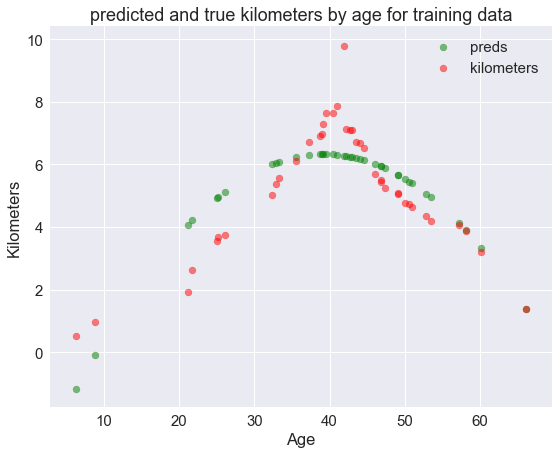

In [20]:
plt.figure(figsize=(9,7))

#the below scatter plots compares train predicted and actual kilometer values
#plot age_train values Vs predicted values in green
plt.scatter(age_train,y_pred_train, alpha=0.5, c='g', label= "preds")

#plot actual age values Vs actual Kms values of training data in red
plt.scatter(age_train,y_train, alpha=0.5, c='r', label = "kilometers")

#for adding labels and title
plt.legend()
plt.legend()
plt.title('predicted and true kilometers by age for training data')
plt.xlabel('Age')
plt.ylabel('Kilometers')

## Question 5.  Finish this notebook to fit the model to the test data.  How is the fit? (4 points)


In [21]:
y_pred_test = model_fit.predict(X_test)

In [22]:
#stores 10 age data values of test data in test_age variable
test_age = X_test.iloc[:,0:1]
#test_age

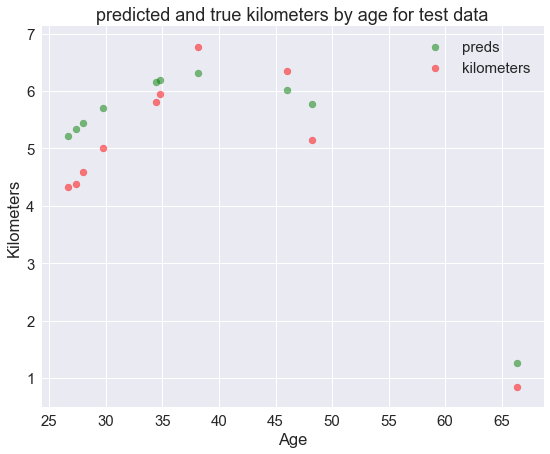

In [23]:
plt.figure(figsize=(9,7))
#the below scatter plots compares predicted and actual kilometer values
#plot test_age values Vs predicted values in green
plt.scatter(test_age,y_pred_test, alpha=0.5, c='g',label= "preds")

#plot actual age values Vs actual Kms values in red
plt.scatter(test_age,y_test, alpha=0.5, c='r',label= "kilometers")

#for adding labels and title
plt.title('predicted and true kilometers by age for test data')
plt.xlabel('Age')
plt.ylabel('Kilometers')
plt.legend()

In [30]:
from sklearn import metrics
#to Print MSE for test data
#source: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
print(metrics.mean_squared_error(y_test,y_pred_test))

0.3976475134564331


In [33]:
#to Print MSE for train data
print(metrics.mean_squared_error(y_train,y_pred_train))

1.1396754424975004


In [31]:
#to print RMSE for test data
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

0.6305929855750325


In [35]:
#to print RMSE for train data
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

1.0675558264079217


In [32]:
r2 = r2_score(y_test,y_pred_test)
print(r2)

0.8390175458041148


In [34]:
r2_train = r2_score(y_train,y_pred_train)
print(r2_train)

0.715377959967922


The training data set has 40 values and the predicted values in green shows parabola shape. The test data has 10 rows and it also shows parabola shape as opposed to the original data set values, which initially show positive correlation between kms and age but then after the age of 40, there exist negative correlation between age and Kms. 
The r-square value for train data was 71.5% but for test data is 83.9%.
Also the RMSE and MSE values for are more for train data than for test data. so we can say that the scatter plot 
from test data (as shown in Q5) is better fit.